<b>Проект: Сборный проект</b> 

Основная цель проекта - определить успешные платформы для продажи игр, популярные жанры игр, составить портрет пользователя по каждому региону продаж, определить зависимость продаж от оценок.

В ходе исследования будут загружены и подготовлены данные с продажами игр по трем регионам. Ознакомимся с общей информацией, которая представлена в данных.

Проведу предобработку данных: приведу названия столбцов к нижнему регистру, преобразую данные в нужные типы, обработаю пропуски, дубликаты, посчитаю суммарные продажи во всех регионах.

Далее проведу исследовательский анализ данных: посчитаю, сколько игр выпускалось в разные годы; проверю, как менялись продажи по платформам, выберу платформы с наибольшими суммарными продажами и построю распределение по годам; определю срок, за который появляются новые и исчезают старые платформы; определю актуальный период; выберу потенциально прибыльные платформы; проверю влияние оценок на продажи игр; определю прибыльные жанры по регионам.

Составлю портрет пользователя по каждому региону продаж: популярные платформы, популярные жанры, определю влияние рейтинга ESRB на продажи.

Последний шаг - проверка гипотез.

</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st

# Загрузка данных:

In [2]:
data = pd.read_csv('/datasets/games.csv')

# 1) Общая информация о данных:

In [3]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Всего 10 столбцов и 16715 строк, представлены следующие данные: дробные и целые числа, и тип данных object. Названия столбцов необходимо привести к нижнему регистру. Данные в столбце Year_of_Release нужно преобразовать в int. Тип даннных в столбце User_Score необходимо преобразовать во float. Кроме того имеются пропуски в столбцах Name, Year_of_Release, Genre, Critic_Score, Rating. 

In [4]:
data.head(5) #

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


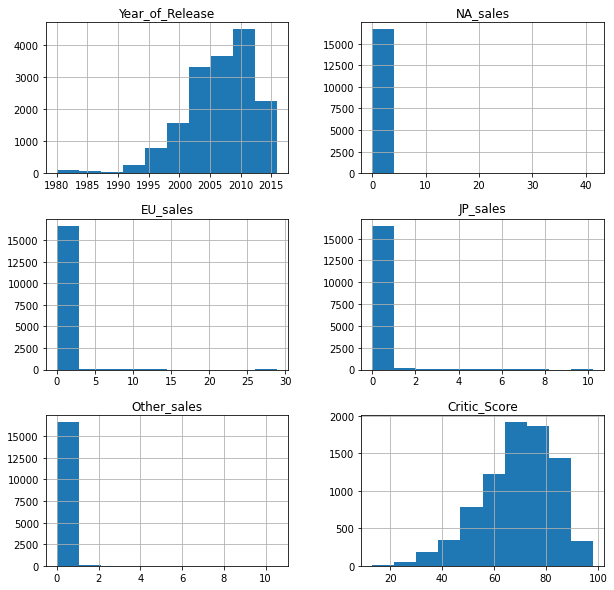

In [5]:
data.hist(figsize=(10, 10)); # на графиках видно, что игры представлены с 1980 года по 2016 год

In [6]:
data_name_unique = data['Name'].unique()
data_name_unique_len = len(data_name_unique)
display(data_name_unique)
display('Количество уникальных игр в данных:', data_name_unique_len) # 11560 уникальных значений игр

data_platform_unique = data['Platform'].unique()
display(data_platform_unique) # проверил уникальные значения платформ

data_genre_unique = data['Genre'].unique()
display(data_genre_unique) # проверил уникальные значения жанров, имеется значение 'Platform' и nan

data_user_score_unique = data['User_Score'].unique()
display(data_user_score_unique) # проверил уникальные значения столца user_score, среди значений есть nan и tbd

data_rating_unique = data['Rating'].unique()
display(data_rating_unique) # проверил уникальные значения присвоенного рейтинга, среди значений есть nan

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

'Количество уникальных игр в данных:'

11560

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

# 2) Предобработка данных:

In [7]:
data = data.rename(columns={'Name': 'name', 'Platform': 'platform', 'Year_of_Release': 'year_of_release', 'Genre': 'genre', 'NA_sales': 'na_sales', 'EU_sales': 'eu_sales', 'JP_sales': 'jp_sales', 'Other_sales': 'other_sales', 'Critic_Score': 'critic_score', 'User_Score': 'user_score', 'Rating': 'rating'})
# привел названия столбцов к нижнему регистру

In [8]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [9]:
data_dublicates = data.duplicated()
print(data_dublicates.sum()) # проверю наличие явных дубликатов в данных, явные дубликаты отсутствуют

0


In [10]:
display(data['name'].value_counts())

Need for Speed: Most Wanted                          12
FIFA 14                                               9
Ratatouille                                           9
Madden NFL 07                                         9
LEGO Marvel Super Heroes                              9
                                                     ..
Crayola: Treasure Adventures                          1
The Witcher: Enhanced Edition                         1
Yu-Gi-Oh! GX: The Beginning of Destiny (US sales)     1
Smurf: Rescue In Gargamel's Castle                    1
Last Bronx                                            1
Name: name, Length: 11559, dtype: int64

In [11]:
need_for_speed_data = data[data['name'] == 'Need for Speed: Most Wanted']
display(need_for_speed_data) 
# проверил неявные дубликаты в столбце name по строке 'Need for Speed: Most Wanted', игра в разные годы выпускалась для разных платформ, скорее всего по другим играм аналогичная картина

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


In [12]:
display(data['platform'].value_counts()) 
# возможно дубликаты есть, например GC и GG, но эту информацию необходимо уточнить у тех людей, кто предоставил датафрейм

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

In [13]:
display(data['genre'].value_counts()) # в жанрах неявные дубликаты отсутствуют

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

In [14]:
name_nan = data['name'].isna()
name_nan_rows = data[name_nan]
print(name_nan_rows) # проверил игры со значением NaN в столбце name, можно их удалить, так как существенно не окажут влияние на анализ

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


In [15]:
data = data.dropna(subset=['name']) # удалил NaN в столбце name

In [16]:
name_nan_sum = data['name'].isna().sum()
print(name_nan_sum) # проверил количество NaN в столбце name

0


In [17]:
year_of_release_nan_sum = data['year_of_release'].isna().sum()
print(year_of_release_nan_sum) # 269 NaN в столбце year_of_release

269


In [18]:
data['year_of_release'] = data['year_of_release'].fillna(0) # заменил NaN в столбце year_of_release на 0, так как год релиза этих игр неизвестен

In [19]:
year_of_release_nan_sum = data['year_of_release'].isna().sum()
print(year_of_release_nan_sum)  # проверил количество NaN в столбце year_of_release

0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [21]:
data['year_of_release'] = data['year_of_release'].astype(int) # преобразовал данные в столбце в int, убрал дробную часть

In [22]:
user_score_tbd = data[data['user_score'] == 'tbd']
display(user_score_tbd) # возможно означает, что рейтинг будет объявлен поздней to be determined, это значение есть в 2424 строках

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [23]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan # заменил значения tbd на NaN, теперь он похож на столбец critic_score

In [24]:
data['user_score'] = data['user_score'].astype(float) # преобразовал данные в столбце user_score в float

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


В столбцах critic_score, user_score и rating много пропущенных значений, менять их не буду, так как это может повлиять и исказить исследовательский анализ данных.

# 3) Суммарные продажи по всем регионам:

In [26]:
data['common_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] 
# добавил столбец суммарных продаж

In [27]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,common_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [28]:
common_sales_nan_sum = data['common_sales'].isna().sum()
print(common_sales_nan_sum)

0


# 4) Исследовательский анализ данных:

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

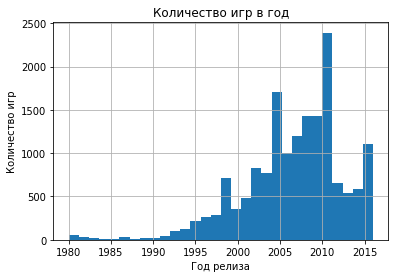

In [29]:
data['year_of_release'].hist(range=(1980, 2016), bins = 30);
plt.title('Количество игр в год')
plt.ylabel('Количество игр')
plt.xlabel('Год релиза');
 # проверим в какие годы выпускалось больше всего игр

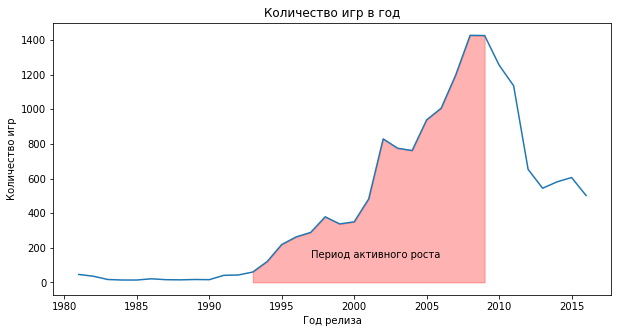

In [30]:
data_amount_year = data[data['year_of_release'] > 1980].groupby('year_of_release').size()
data_amount_year.plot(kind='line', figsize=(10, 5));

plt.title('Количество игр в год')
plt.ylabel('Количество игр')
plt.xlabel('Год релиза');

plt.fill_between(data_amount_year.index, data_amount_year.values, where=(data_amount_year.index >= 1993) & (data_amount_year.index <= 2009), alpha=0.3, color='red')
plt.text(1997, data_amount_year.max() * 0.1, 'Период активного роста', color='black', fontsize=10);

Планомерный рост выпуска игр наблюдался с начала 90-ых, пик был достигнут в 2008-2009 годах, затем началось резкое снижение выпуска игр.

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [31]:
platform_common_sales = data.pivot_table(index = 'platform', columns='year_of_release', values = 'common_sales', aggfunc = 'sum')
display(platform_common_sales)

year_of_release,0,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
2600,10.50,11.38,35.68,28.88,5.84,0.27,0.45,0.67,1.94,0.74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DS,1.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
DC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.02,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,3.34,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN,NaN,...,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
GB,1.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBA,4.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,2.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
top_platform_common_sales = data.pivot_table(index = 'platform', values = 'common_sales', aggfunc = 'sum').sort_values(by = 'common_sales', ascending = False)
top_platform_common_sales = top_platform_common_sales[top_platform_common_sales['common_sales'] > 100] # оставил топ 18 платформ
display(top_platform_common_sales)

,common_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


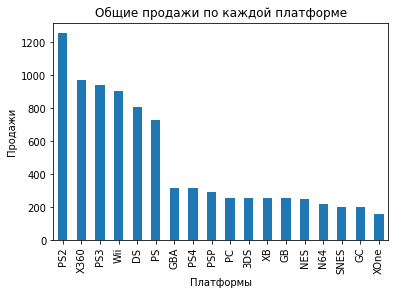

In [33]:
top_platform_common_sales.groupby('platform')['common_sales'].sum().sort_values(ascending=False).plot(kind='bar');
plt.ylabel('Продажи')
plt.xlabel('Платформы')
plt.title('Общие продажи по каждой платформе');

In [34]:
top_platform_year_common_sales = top_platform_common_sales.merge(platform_common_sales, on='platform')
display(top_platform_year_common_sales)

,common_sales,0,1980,1981,1982,1983,1984,1985,1986,1987,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
PS2,1255.77,22.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,75.99,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN,NaN
X360,971.42,10.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95.41,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96,1.52
PS3,939.65,8.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.19,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.60
Wii,907.51,16.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,152.77,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18
DS,806.12,3.34,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN,...,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
PS,730.86,3.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBA,317.85,4.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PS4,314.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.99,100.00,118.90,69.25
PSP,294.05,4.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,46.93,34.55,37.78,35.04,17.82,7.69,3.14,0.24,0.12,NaN


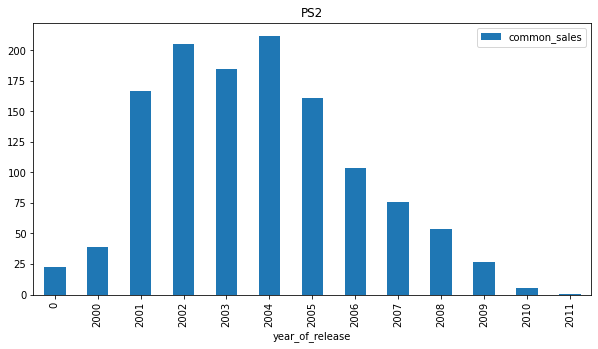

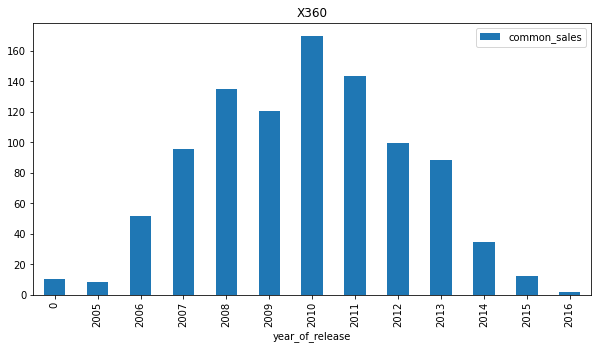

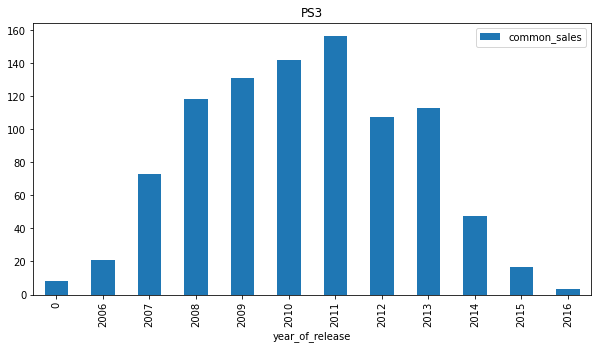

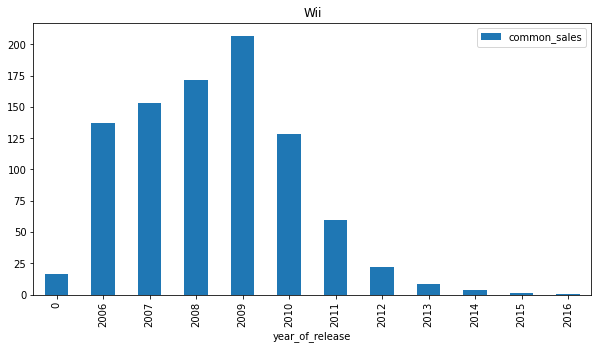

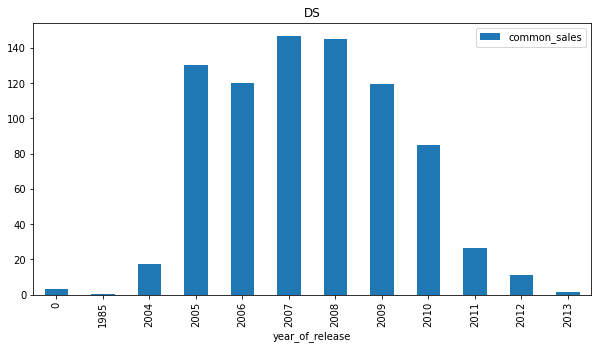

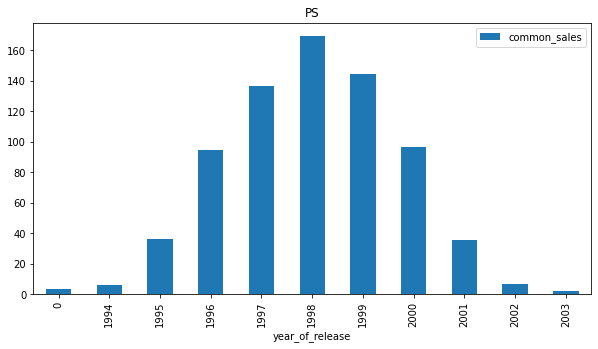

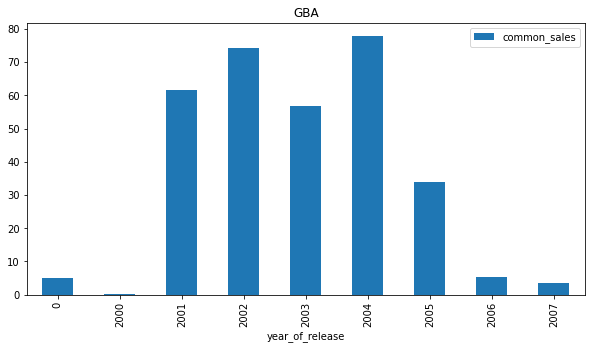

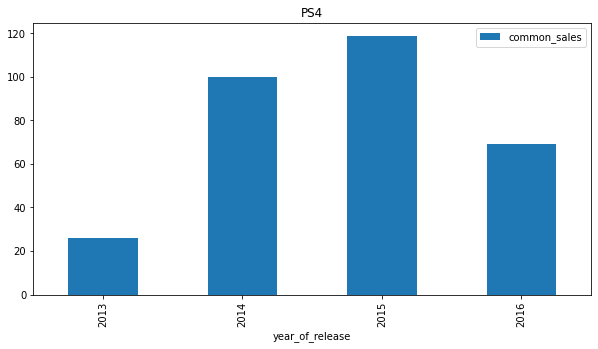

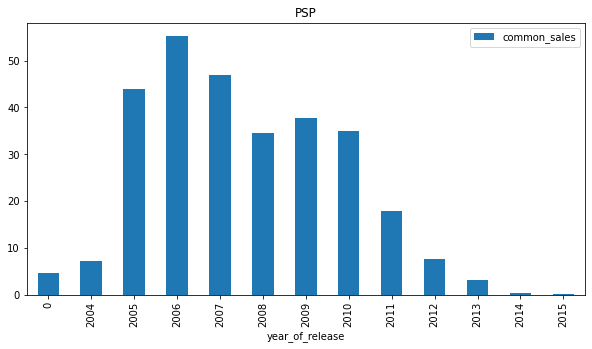

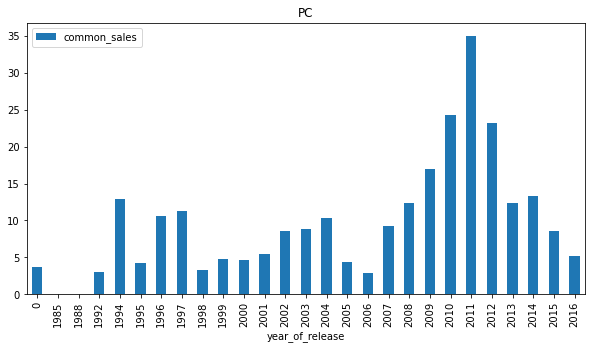

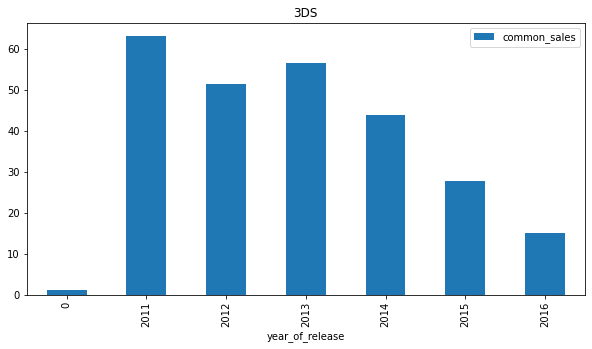

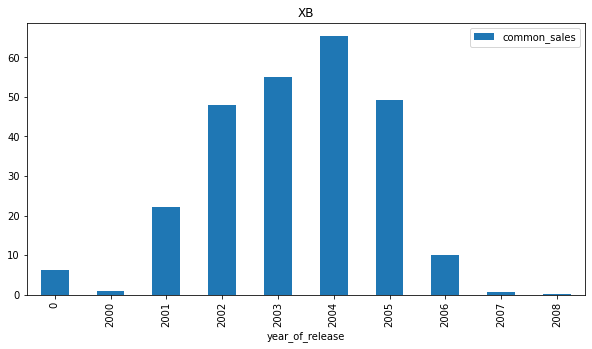

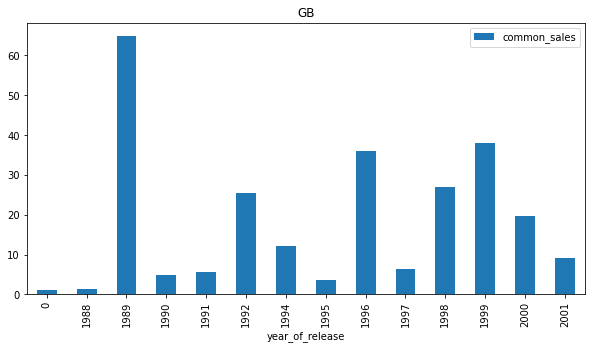

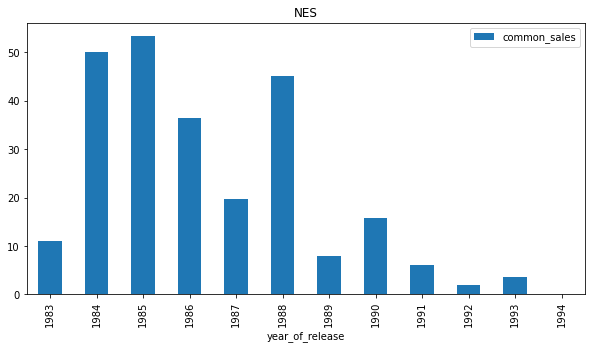

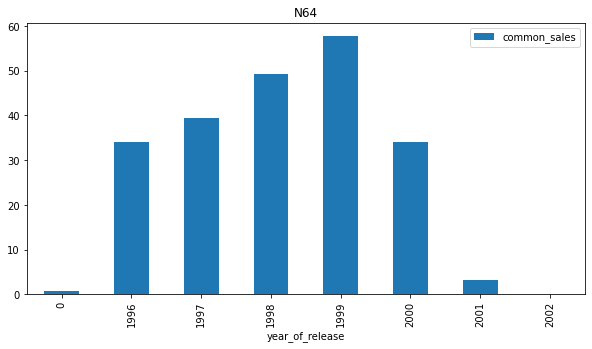

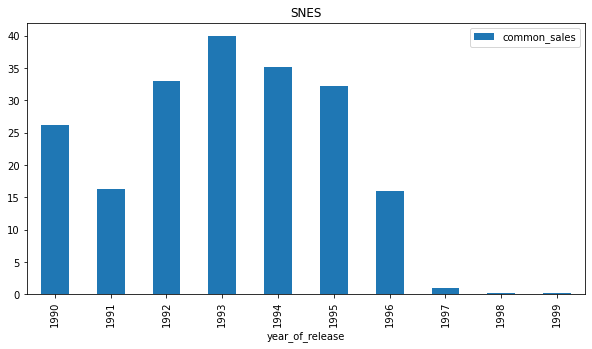

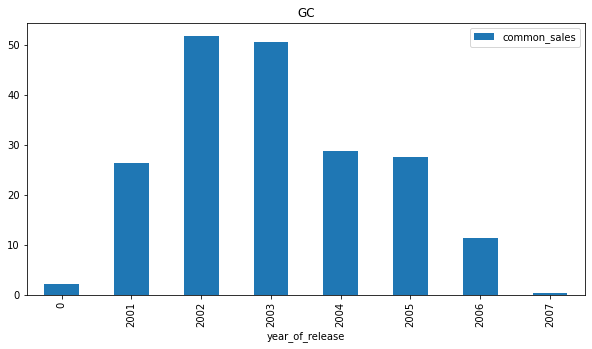

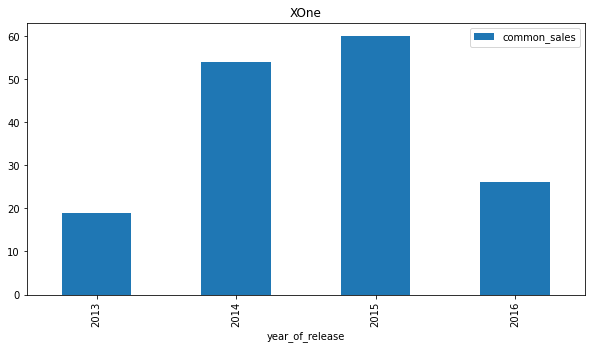

In [35]:
platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC', '3DS', 'XB', 'GB', 'NES', 'N64', 'SNES', 'GC', 'XOne']

for platform in platforms:
    platform_sales_year = data[data['platform'] == platform].pivot_table(index='year_of_release', values='common_sales', aggfunc='sum').plot(kind='bar', figsize=(10, 5))
    plt.title(platform)

Вывод: Характерный срок за который появляются и исчезают платформы - 10 -12 лет, есть платформы долгожители и те, которым 4 года.

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Не учитывайте в работе данные за предыдущие годы.

Вывод: За актуальный период можно принять промежуток с 2014 года по 2016 год, так как у большинства платформ эти годы пересекаются на графиках.

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

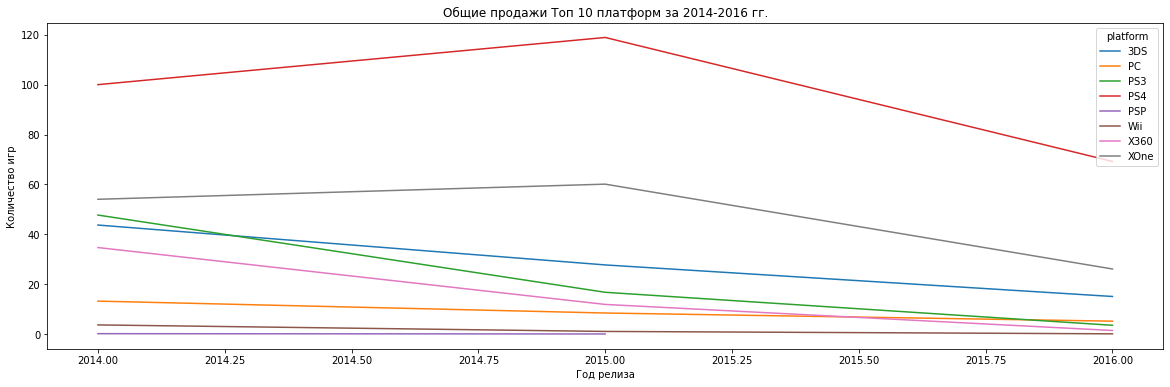

In [36]:
actual_period = data.query('year_of_release >= 2014') # возьму данные для топ 10 платформ после 2014 года
actual_period.query('platform in @platforms').pivot_table(index='year_of_release', columns = 'platform', values='common_sales', aggfunc='sum').plot(figsize=(20, 6));
plt.title('Общие продажи Топ 10 платформ за 2014-2016 гг.')
plt.ylabel('Количество игр')
plt.xlabel('Год релиза');

Вывод: На графике осталось 8 платформ. Продажи на всех платформах падают без исключения. Но можно выделить три платформы это PS4 и XOne, так как они новые и имеют большой объем продаж и платформу PC, так как она имеет стабильные продажи на всем отрезке времени своего существования.

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

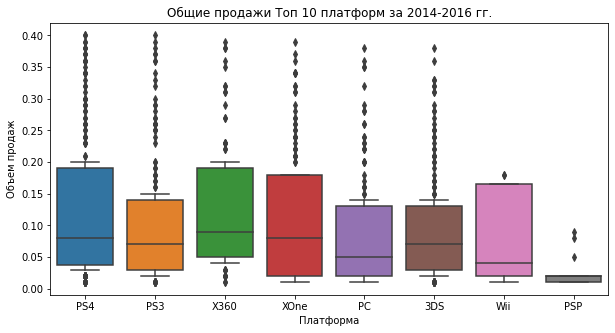

In [37]:
actual_period = data.query('year_of_release >= 2014 and platform in @platforms and common_sales < 0.4')

plt.figure(figsize=(10, 5))
sns.boxplot(data=actual_period, x='platform', y='common_sales', whis=0.1)


plt.title('Общие продажи Топ 10 платформ за 2014-2016 гг.')
plt.ylabel('Объем продаж')
plt.xlabel('Платформа');

Вывод: Медианные значения примерно равны у платформ X360, PS3, PS4, XOne, у них же и самый большой межквартильный размах, но PS3 не имеет перспектив, так как продажи упали. платформа Wii - похожа межквартильным размахом, но медианное значение ниже, чем у других платформ из этого списка. Платформа Wii практически не имеет выбросов, а платформы PS3, PC, 3DS имеют самое большое количество выбросов.

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

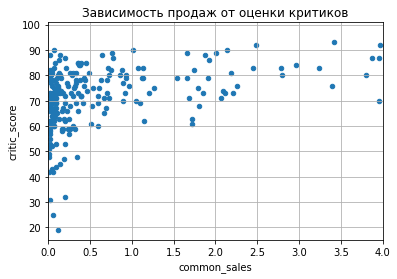

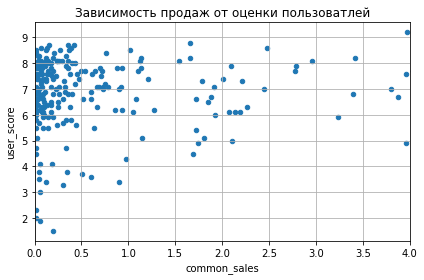

In [38]:
# возьму для исследования платформу PS4
data[(data['platform'] == 'PS4') & (data['year_of_release'] >= 2014)].plot(x='common_sales', y='critic_score', kind='scatter', grid=True);
plt.title('Зависимость продаж от оценки критиков');
plt.xlim(0, 4)

data[(data['platform'] == 'PS4') & (data['year_of_release'] >= 2014)].plot(x='common_sales', y='user_score', kind='scatter', grid=True);
plt.title('Зависимость продаж от оценки пользоватлей');
plt.xlim(0, 4)

plt.tight_layout()

Вывод: На диаграммах рассеивания видно, что чем выше оценки, тем больше объем продаж.

In [39]:
# проверю корреляцию между отзывами и продажами

correlation_critic = data[(data['platform'] == 'PS4') & (data['year_of_release'] >= 2014)]['common_sales'].corr(data[data['platform'] == 'PS4']['critic_score'])
print(f'Корреляция между common_sales и critic_score: {correlation_critic}') # вычислил корреляцию между critic_score для данных платформы 'PS4'

correlation_user = data[(data['platform'] == 'PS4') & (data['year_of_release'] >= 2014)]['common_sales'].corr(data[data['platform'] == 'PS4']['user_score'])
print(f'Корреляция между common_sales и user_score: {correlation_user}') # вычислил корреляцию между common_sales для данных платформы 'PS4'


Корреляция между common_sales и critic_score: 0.40266141068104083
Корреляция между common_sales и user_score: -0.040131589472697356


Вывод: Для платформы PS4 зависимость продаж от отзывов критиков высокая, в то время как, от отзывов пользователей продажи не зависят.

Соотнесите выводы с продажами игр на других платформах.

Для платформы XOne

In [40]:
correlation_critic = data[(data['platform'] == 'XOne') & (data['year_of_release'] >= 2014)]['common_sales'].corr(data[data['platform'] == 'XOne']['critic_score'])
print(f'Корреляция между common_sales и critic_score: {correlation_critic}')

correlation_user = data[(data['platform'] == 'XOne') & (data['year_of_release'] >= 2014)]['common_sales'].corr(data[data['platform'] == 'XOne']['user_score'])
print(f'Корреляция между common_sales и user_score: {correlation_user}') 

Корреляция между common_sales и critic_score: 0.42867694370333226
Корреляция между common_sales и user_score: -0.0703839280647581


Вывод: Для платформы XOne зависимость продаж от отзывов критиков высокая, в то время как, от отзывов пользователей продажи не зависят.

Для платформы PC

In [41]:
correlation_critic = data[(data['platform'] == 'PC') & (data['year_of_release'] >= 2014)]['common_sales'].corr(data[data['platform'] == 'PC']['critic_score'])
print(f'Корреляция между common_sales и critic_score: {correlation_critic}')

correlation_user = data[(data['platform'] == 'PC') & (data['year_of_release'] >= 2014)]['common_sales'].corr(data[data['platform'] == 'PC']['user_score'])
print(f'Корреляция между common_sales и user_score: {correlation_user}') 

Корреляция между common_sales и critic_score: 0.17463413769350036
Корреляция между common_sales и user_score: -0.07159665703472452


Вывод: Для платформы PC зависимость продаж от отзывов критиков немного выше, чем от отзывов пользователей.

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

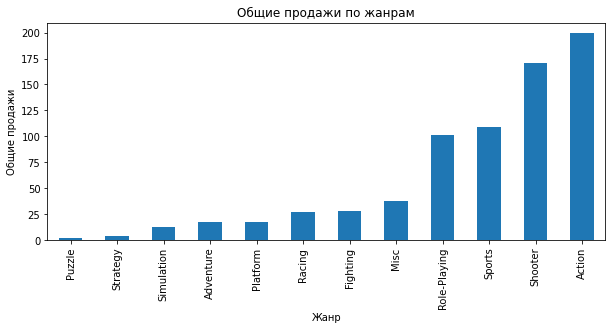

In [42]:
data[data['year_of_release'] >= 2014].groupby('genre')['common_sales'].sum().sort_values(ascending=True).plot(kind='bar', figsize=(10, 4))

plt.title('Общие продажи по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Общие продажи');

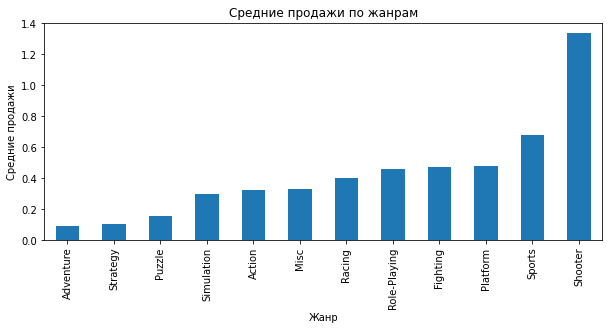

In [43]:
data[data['year_of_release'] >= 2014].groupby('genre')['common_sales'].mean().sort_values(ascending=True).plot(kind='bar', figsize=(10, 4))

plt.title('Средние продажи по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Средние продажи');

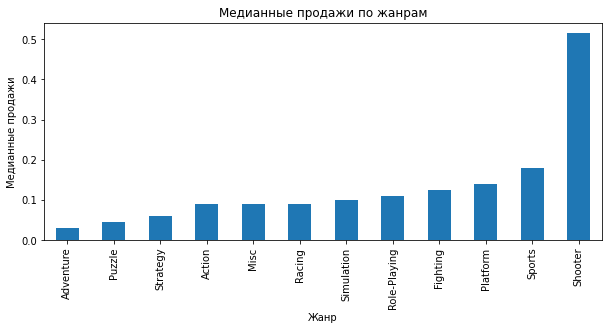

In [44]:
data[data['year_of_release'] >= 2014].groupby('genre')['common_sales'].median().sort_values(ascending=True).plot(kind='bar', figsize=(10, 4))

plt.title('Медианные продажи по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Медианные продажи');

Вывод: Самые высокопродаваемые жанры - Action, Shooter, Sports, жанры с низкими продажами - Strategy и Puzzle. Но если рассмотреть средниеи медианные продажи, то в лидерах Sports и Shooter!

# 5) Составьте портрет пользователя каждого региона:

Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

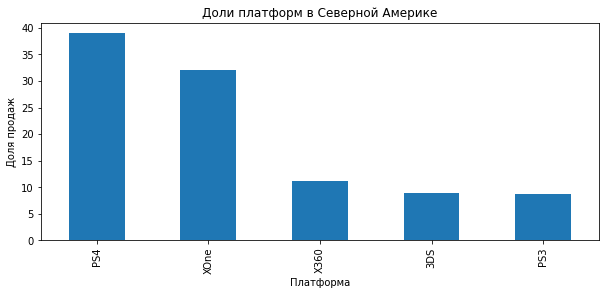

In [63]:
top_platform_na = data[data['year_of_release'] >= 2014].groupby('platform')['na_sales'].sum().sort_values(ascending=True).nlargest(5)
top_platform_na_proportion = top_platform_na.apply(lambda x: x / top_platform_na.sum() * 100)
top_platform_na_proportion.plot(kind='bar', figsize=(10, 4), stacked=True)
plt.title('Доли платформ в Северной Америке')
plt.xlabel('Платформа')
plt.ylabel('Доля продаж');

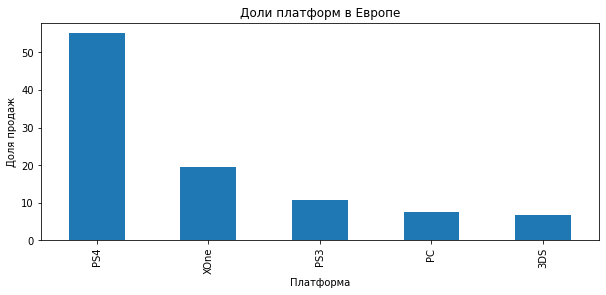

In [65]:
top_platform_eu = data[data['year_of_release'] >= 2014].groupby('platform')['eu_sales'].sum().sort_values(ascending=True).nlargest(5)
top_platform_eu_proportion = top_platform_eu.apply(lambda x: x / top_platform_eu.sum() * 100)
top_platform_eu_proportion.plot(kind='bar', figsize=(10, 4), stacked=True)
plt.title('Доли платформ в Европе')
plt.xlabel('Платформа')
plt.ylabel('Доля продаж');

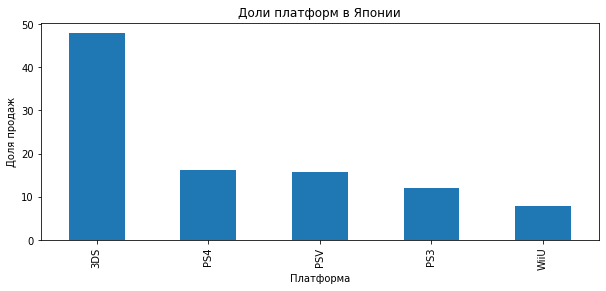

In [47]:
top_platform_jp = data[data['year_of_release'] >= 2014].groupby('platform')['jp_sales'].sum().sort_values(ascending=True).nlargest(5)
top_platform_jp_proportion = top_platform_jp.apply(lambda x: x / top_platform_jp.sum() * 100)
top_platform_jp_proportion.plot(kind='bar', figsize=(10, 4), stacked=True)
plt.title('Доли платформ в Японии')
plt.xlabel('Платформа')
plt.ylabel('Доля продаж');

Вывод: 3DS - абсолютный лидер на рынке Японии, PS4 имеет примерно 15% долю. PS4 и XOne занимают наибольшие доли на рынке Северной Америки и Европы, платформа PC занимет небольшую долю на рынке Европы.

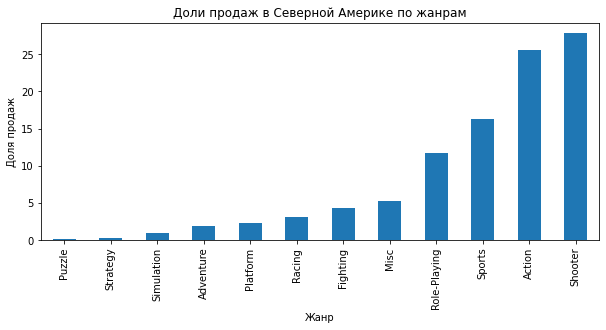

In [48]:
top_genres_na = data[data['year_of_release'] >= 2014].groupby('genre')['na_sales'].sum().sort_values(ascending=True)
top_genres_na_proportion = top_genres_na.apply(lambda x: x / top_genres_na.sum() * 100)
top_genres_na_proportion.plot(kind='bar', figsize=(10, 4), stacked=True)
plt.title('Доли продаж в Северной Америке по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Доля продаж');

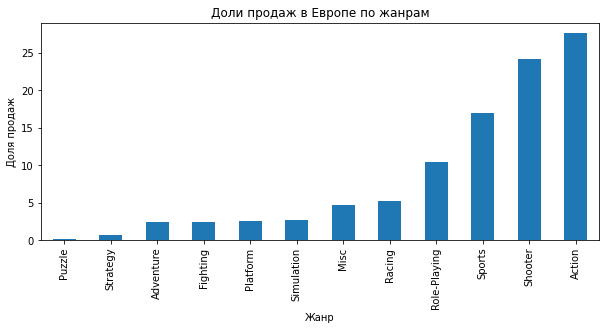

In [49]:
top_genres_eu = data[data['year_of_release'] >= 2014].groupby('genre')['eu_sales'].sum().sort_values(ascending=True)
top_genres_eu_proportion = top_genres_eu.apply(lambda x: x / top_genres_eu.sum() * 100)
top_genres_eu_proportion.plot(kind='bar', figsize=(10, 4), stacked=True)
plt.title('Доли продаж в Европе по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Доля продаж');

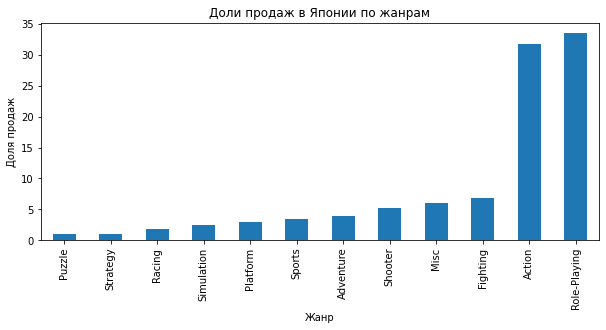

In [50]:
top_genres_jp = data[data['year_of_release'] >= 2014].groupby('genre')['jp_sales'].sum().sort_values(ascending=True)
top_genres_jp_proportion = top_genres_jp.apply(lambda x: x / top_genres_jp.sum() * 100)
top_genres_jp_proportion.plot(kind='bar', figsize=(10, 4), stacked=True)
plt.title('Доли продаж в Японии по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Доля продаж');

Вывод: Предпочтения пользователей Северной Америки и Европы очень схожи, они предпочитают жанр Action, Sports, Shooter и в наименьшей степени Strategy и Puzzle. А японские пользователи предпочитают жанр Role-Playing и Action, которые являются абсолютными лидерами по популярности с долей более 30% каждый, и самый отстающие жанры - Puzzle и Strategy.

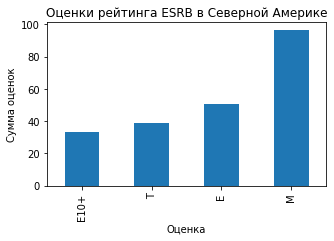

In [51]:
rating_depend_na = data[data['year_of_release'] >= 2014].groupby('rating')['na_sales'].sum().sort_values(ascending=True)
rating_depend_na.plot(kind='bar', figsize=(5, 3), stacked=True)
plt.title('Оценки рейтинга ESRB в Северной Америке')
plt.xlabel('Оценка')
plt.ylabel('Сумма оценок');

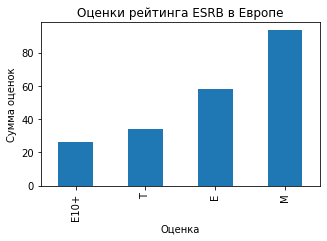

In [52]:
rating_depend_eu = data[data['year_of_release'] >= 2014].groupby('rating')['eu_sales'].sum().sort_values(ascending=True)
rating_depend_eu.plot(kind='bar', figsize=(5, 3), stacked=True)
plt.title('Оценки рейтинга ESRB в Европе')
plt.xlabel('Оценка')
plt.ylabel('Сумма оценок');

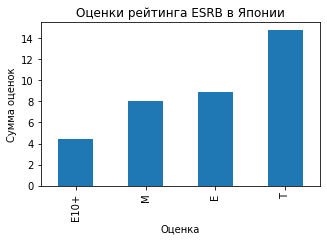

In [53]:
rating_depend_jp = data[data['year_of_release'] >= 2014].groupby('rating')['jp_sales'].sum().sort_values(ascending=True)
rating_depend_jp.plot(kind='bar', figsize=(5, 3), stacked=True)
plt.title('Оценки рейтинга ESRB в Японии')
plt.xlabel('Оценка')
plt.ylabel('Сумма оценок');

In [54]:
regions = ['na_sales', 'na_sales', 'na_sales']
rating_regions = data[data['year_of_release'] >= 2014].pivot_table(index = 'rating', values = ['na_sales','eu_sales','jp_sales'], aggfunc = 'sum')
display(rating_regions)

,eu_sales,jp_sales,na_sales
rating,,,
E,58.06,8.94,50.74
E10+,26.16,4.46,33.23
M,93.44,8.01,96.42
T,34.07,14.78,38.95


Вывод: Рейтинг ESRB оказывает влияние на продажи игр, например благодаря оценке E продажи игр в Европе самые высокие, тоже самое прослеживается и по другим оценкам.

# 6) Проверка гипотез:

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Нулевая гипотеза: 

Средний пользовательский рейтинг XOne = Средний пользовательский рейтинг PC.

Алетернативная гипотеза: 

Средний пользовательский рейтинг XOne != Средний пользовательский рейтинг PC (средние значения отличаются). Буду использовать параметр alternative='two-sided'

In [55]:
user_score_xone_mean = data[data['year_of_release'] >= 2014].query("platform == 'XOne'")['user_score'].mean()
print(user_score_xone_mean.round(2))

user_score_pc_mean = data[data['year_of_release'] >= 2014].query("platform == 'PC'")['user_score'].mean()
print(user_score_pc_mean.round(2))

6.59
6.3


In [56]:
results = st.ttest_ind(data[data['year_of_release'] >= 2014].query("platform == 'XOne'")['user_score'],
                       data[data['year_of_release'] >= 2014].query("platform == 'PC'")['user_score'], 
                       alternative='two-sided', 
                       nan_policy='omit') # исключу значения nan из выборок 

print('p-значение:', results.pvalue)

alpha = 0.05

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.10450507919348513
Не получилось отвергнуть нулевую гипотезу


Вывод: Не получилось отвергнуть нулевую гипотезу, средние значения не отличаются или практически не отличаются. В ходе проверки выяснил, что средний пользовательский рейтинг PC немного выше, чем у XOne.

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза:

Средний пользовательский рейтинг жанра Action = Средний пользовательский рейтинг жанра Sports.

Альтернативная гипотеза:

Средний пользовательский рейтинг жанра Action != Средний пользовательский рейтинг жанра Sports(средние значения отличаются). Буду использовать параметр alternative='two-sided'

In [57]:
user_score_action_mean = data[data['year_of_release'] >= 2014].query("genre == 'Action'")['user_score'].mean()
print(user_score_action_mean)

user_score_sports_mean = data[data['year_of_release'] >= 2014].query("genre == 'Sports'")['user_score'].mean()
print(user_score_sports_mean)

6.760606060606061
5.225196850393701


In [58]:
results = st.ttest_ind(data[data['year_of_release'] >= 2014].query("genre == 'Action'")['user_score'],
                       data[data['year_of_release'] >= 2014].query("genre == 'Sports'")['user_score'],
                       alternative='two-sided',
                       nan_policy='omit',
                       equal_var=False) # исключу значения nan из выборок 

print('p-значение:', results.pvalue)

alpha = 0.05

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.182555038264477e-14
Отвергаем нулевую гипотезу


Вывод: Нулевую гипотезу отвергли, значения оценок отличаются. В ходе проверки выяснил, что пользовательсикй рейтинг жанров сильно отличается.

# Вывод:

В ходе проведенного исследования удалось выяснить следующее:

Планомерный рост выпуска игр наблюдался с начала 90-ых, пик был достигнут в 2008-2009 годах, затем началось резкое снижение выпуска игр.

Характерный срок за который появляются и исчезают платформы - 10 - 12 лет, есть платформы долгожители и те, которым 4 года. Актуальный период 2014 - 2016 год, но 2016 год возможно не имеет полных данных, это следует учитывать.

Продажи на всех платформах падают без исключения. Но можно выделить три платформы это PS4 и XOne, так как они новые и имеют большой объем продаж и платформу PC, так как она имеет стабильные продажи на всем отрезке времени своего существования. Платформа 3DS - абсолютный лидер на рынке Японии, PS4 имеет примерно 15% долю. PS4 и XOne занимают наибольшие доли на рынке Северной Америки и Европы, платформа PC занимет небольшую долю на рынке Европы. 

Самые высокопродаваемые жанры - Action, Shooter, Sports, жанры с низкими продажами - Strategy и Puzzle. Но если рассмотреть средниеи медианные продажи, то в лидерах Sports и Shooter! Предпочтения пользователей Северной Америки и Европы очень схожи, они предпочитают жанр Action, Sports, Shooter и в наименьшей степени Strategy и Puzzle. А японские пользователи предпочитают жанр Role-Playing и Action, которые являются абсолютными лидерами по популярности с долей более 30% каждый, и самый отстающие жанры - Puzzle и Strategy.

Чем выше оценки, тем больше объем продаж, но это происходит не во всех случаях, кроме того, где-то сильнее влияет оценка критиков, а где-то оценка пользователей, необходимо рассматривать более детально. Рейтинг ESRB оказывает влияние на продажи игр, например благодаря оценке E продажи игр в Европе самые высокие, тоже самое прослеживается и по другим оценкам.

Были протестированы две гипотезы:

В первом случае не получилось отвергнуть нулевую гипотезу, средние значения не отличаются или практически не отличаются. 

Во втором случае нулевую гипотезу отвергли, значения оценок отличаются.